Perceptron

 > is an artificial neuron that can make a simple decision

Perceptron has three main components:

1. Inputs: Each input corresponds to a feature. For example, in the case of a person, features could be age, height, weight, college degree, etc.

2. Weights: Each input also has a weight which assigns a certain amount of importance to the input. If an input’s weight is large, it means this input plays a bigger role in determining the output. For example, a team’s skill level will have a bigger weight than the average age of players in determining the outcome of a match.

3. Output: Finally, the perceptron uses the inputs and weights to produce an output. The type of the output varies depending on the nature of the problem. For example, to predict whether or not it’s going to rain, the output has to be binary — 1 for Yes and 0 for No. However, to predict the temperature for the next day, the range of the output has to be larger — say a number from 70 to 90.

In [15]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[1,1]):
        self.num_inputs = num_inputs
        self.weights =  weights
        
    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
            weighted_sum += inputs[i] * self.weights[i]
        return weighted_sum
    
    def activation(self, weighted_sum):
        if weighted_sum  >= 0:
            return 1
        elif weighted_sum < 0:
            return -1
        
    def training(self, training_set):
        foundLine = False
        while not foundLine:
          total_error = 0
          for inputs in training_set:
            prediction = self.activation(self.weighted_sum(inputs))
            actual = training_set[inputs]
            error = actual - prediction
            total_error += abs(error)
            for i in range(self.num_inputs):
              self.weights[i] += (error * inputs[i])
          if total_error == 0:
            foundLine = True
            

**weighted sum**

> weighted_sum = (xinput_1 * weight_1) + (xinput_2 * weight_2) + ... + (xinput_n * weight_n)


* foundLine = False (a boolean that indicates whether the perceptron has found a line to separate the positive and negative labels)
* while not foundLine: (a while loop that continues to train the perceptron until the line is found)
* total_error = 0 (to count the total error the perceptron makes in each round)
* total_error += abs(error) (to update the total error the perceptron makes in each round)

In [9]:
cool_perceptron = Perceptron()

In [10]:
cool_perceptron.weighted_sum([24,55])

79

**Activation Function**

After finding the weighted sum, the second step is to constrain the weighted sum to produce a desired output.

to train a perceptron to detect whether a point is above or below a line, we want the output to be a +1 or -1 label. For this task,  use the “sign activation function” to help the perceptron make the decision

* If weighted sum is positive, return +1
* If weighted sum is negative, return -1

**Training Perceptron**

* to produce better and better results
* provide the perceptron a training set — a collection of random inputs with correctly predicted outputs.

The goal is to gradually nudge the perceptron — by slightly changing its weights — towards a better version of itself that correctly matches all the input-output pairs in the training set.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

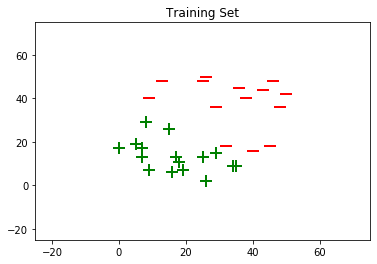

In [13]:
def generate_training_set(num_points):
	x_coordinates = [random.randint(0, 50) for i in range(num_points)]
	y_coordinates = [random.randint(0, 50) for i in range(num_points)]
	training_set = dict()
	for x, y in zip(x_coordinates, y_coordinates):
		if x <= 45-y:
			training_set[(x,y)] = 1
		elif x > 45-y:
			training_set[(x,y)] = -1
	return training_set

training_set = generate_training_set(30)

x_plus = []
y_plus = []
x_minus = []
y_minus = []

for data in training_set:
	if training_set[data] == 1:
		x_plus.append(data[0])
		y_plus.append(data[1])
	elif training_set[data] == -1:
		x_minus.append(data[0])
		y_minus.append(data[1])
    
fig = plt.figure()
ax = plt.axes(xlim=(-25, 75), ylim=(-25, 75))

plt.scatter(x_plus, y_plus, marker = '+', c = 'green', s = 128, linewidth = 2)
plt.scatter(x_minus, y_minus, marker = '_', c = 'red', s = 128, linewidth = 2)

plt.title("Training Set")

plt.show()

**Training Error**

Every time the output mismatches the expected label, we say that the perceptron has made a training error 

> training error = actual label − predicted label

slowly nudge the perceptron towards a better version of itself that eventually has zero error.

The only way to do that is to change the parameters that define the perceptron. We can’t change the inputs so the only thing that can be tweaked are the weights. As we change the weights, the outputs change as well.

The goal is to find the optimal combination of weights that will produce the correct output for as many points as possible in the dataset.

 training set has been represented as a dictionary with coordinates as keys and labels as values
 
` training_set = {(18, 49): -1, (2, 17): 1, (24, 35): -1, (14, 26): 1, (17, 34): -1} `

**Perceptron Algorithm**

tweak the weights optimally
directly apply the algorithm to optimally tweak the weights and nudge the perceptron towards zero error.

> weight = weight + (error * input)weight=weight+(error∗input)

 tweaking the weights until all possible labels are correctly predicted by the perceptron. This means that multiple passes might need to be made through the training_set before the Perceptron Algorithm comes to a halt.

In [16]:
cool_perceptron = Perceptron()
small_training_set = {(0,3):1, (3,0):-1, (0,-3):-1, (-3,0):1}
print(cool_perceptron.training(small_training_set))

None


**Bias Weight**

perceptron can be trained to produce correct outputs by tweaking the regular weights.
minor adjustment is needed for the perceptron to be more accurate. This supporting role is played by the bias weight. It takes a default input value of 1 and some random weight value.

> weighted_sum = (xinput_1 * weight_1) + (xinput_2 * weight_2) + ... + (xinput_n * weight_n) + 1weight_b


A perceptron’s weights can be used to find the slope and intercept of the line that the perceptron represents.

* slope = -self.weights[0]/self.weights[1]
* intercept = -self.weights[2]/self.weights[1]

**Perceptrons as Logical Operators**

**Logical AND**

In [62]:
print(pd.DataFrame([[1,1,0],[0,0,0],[1,0,0],[0,1,0]],columns = ['x1','x2','output']))

   x1  x2  output
0   1   1       0
1   0   0       0
2   1   0       0
3   0   1       0


**Rules**



> weighted_sum = 1 if w1x1 + w2x2 + b >= 0

> weighted_s0 if w1x1 + w2x2 + b < 0


Linear Algebra

In [64]:
np.arange(1,100)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [63]:
weight1 = 0
weight2 = 0
bias = 0
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []


for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = linear_combination >= 0
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


You got 3 wrong.  Keep trying!

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                     0                 True           No
      0          1                     0                 True           No
      1          0                     0                 True           No
      1          1                     0                 True          Yes


In [46]:
relu(weight1 * test_input[0] + weight2 * test_input[1] + bias)

NameError: name 'relu' is not defined

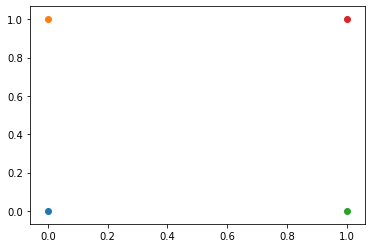

In [8]:
for x,y in test_inputs:
    plt.scatter(x,y)

In [45]:

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    print(linear_combination,output,correct_output)

-2 0 False
-1 0 False
-1 0 False
0 1 True


In [44]:
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    print(linear_combination)
#     output = int(linear_combination >= 0)

-2
-1
-1
0


In [13]:
op = []
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    op.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    


In [14]:
op

[[0, 0, 0.0, 1, 'No'],
 [0, 1, 0.0, 1, 'No'],
 [1, 0, 0.0, 1, 'No'],
 [1, 1, 0.0, 1, 'Yes']]

In [37]:


weight1 = 0.0
weight2 = 0.0
bias = 0.0
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []
ls = []


for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    ls.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

In [40]:
pd.DataFrame(ls)

,0,1,2,3,4
0,0,0,0.0,1,No
1,0,1,0.0,1,No
2,1,0,0.0,1,No
3,1,1,0.0,1,Yes


In [41]:
is_correct_string = 'Yes' for output in if output == correct_output else 'No'

K


In [39]:
np.array([1,2]).shape

(2,)